<a href="https://colab.research.google.com/github/nadasfrr/Kmeansclustering/blob/main/PROVINCIAL_GROUPING_BASED_ON_INDICATORS_AFFECTING_THE_LITERATURE_INDEX_IN_INDONESIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CAPSTONE PROJECT (GROUP)**

##Project Background

Based on data from the Central Statistics Agency (BPS) in 2021 the literacy rate in Indonesia has touched a figure of 98.44 percent. However, the large percentage of literacy is not followed by the high level of literacy in Indonesia. So that’s why from this capstone project, we trying to increase 2% of the literacy index in Indonesia by doing data collection and preparation, creating the data dashboard that presents information about the root of main problems. Besides, we also analyzed the data by clusterization, solving each cluster based on each categorization, and after that find solution that hopefully could solve the problem. The scope of our project is “literacy index in Indonesia based on province grouping”


##Problem Statement anf Formulation

###Problem Statement
Based on data from the Central Statistics Agency (BPS) in 2021 the literacy rate in Indonesia has touched a figure of 98.44 percent. However, the large percentage of literacy is not followed by the high level of literacy in Indonesia. Based on a survey of 80 countries, Indonesia is in the 75th position in the reading interest.


###Problem Formulation
How to increase 2% of literacy index in Indonesia by the end of this year? (2022)

##Import Library and File

In [ ]:
#Importing the Libraries
from pprint import pprint
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Tugas Studi Independen/Capstone Project/Data Capstone - Combine.csv')
data.head()

,No,Provinsi,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan
0,1,Aceh,98.47,8.98,0.20,0.09,0.54,0.04,5.80,2.02,0.50,22.86,14.93,22.13,35.73,16.54,13.14,0.59
1,2,Bali,96.21,8.55,0.41,0.18,0.54,0.02,9.78,2.92,0.51,39.49,23.22,15.08,30.30,22.17,14.09,0.34
2,3,Banten,98.04,8.53,0.25,0.08,1.17,1.35,8.11,3.27,0.62,37.46,20.54,9.54,29.01,21.00,10.72,1.01
3,4,Bengkulu,98.63,8.47,0.19,0.30,0.11,0.01,8.56,2.73,0.42,26.71,18.54,14.14,35.03,16.05,15.28,0.90
4,5,D.I. Yogyakarta,97.09,9.19,0.38,0.28,0.59,0.58,19.76,10.08,0.66,45.38,27.43,26.62,33.93,31.09,20.15,0.59


## Data Understanding

In [ ]:
# Check variable type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   No                                                                              34 non-null     int64  
 1   Provinsi                                                                        34 non-null     object 
 2   Melek Huruf                                                                     34 non-null     float64
 3   RLS                                                                             34 non-null     float64
 4   Persentase perpustakaan sekolah dalam kondisi baik                              34 non-null     float64
 5   Persentase petugas pengelola perpustakaan sekolah                               34 non-null     float64
 6   Persentase perpustak

In [ ]:
# convert data type
for col in data.columns:
  if col != "Provinsi":
    data[col] = data[col].astype(float, errors = 'raise')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 18 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   No                                                                              34 non-null     float64
 1   Provinsi                                                                        34 non-null     object 
 2   Melek Huruf                                                                     34 non-null     float64
 3   RLS                                                                             34 non-null     float64
 4   Persentase perpustakaan sekolah dalam kondisi baik                              34 non-null     float64
 5   Persentase petugas pengelola perpustakaan sekolah                               34 non-null     float64
 6   Persentase perpustak

In [ ]:
data.isna().sum()

No                                                                                0
Provinsi                                                                          0
Melek Huruf                                                                       0
RLS                                                                               0
Persentase perpustakaan sekolah dalam kondisi baik                                0
Persentase petugas pengelola perpustakaan sekolah                                 0
Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk    0
Persentase perpustakaan komunitas per seribu penduduk                             0
Persentase rumah tangga membeli surat kabar / koran                               0
Persentase rumah tangga membeli majalah / tabloid                                 0
Persentase sekolah yang memiliki jaringan akses internet                          0
Persentase Penduduk Mengakses Internet                                      

In [ ]:
data.duplicated().any()

False

In [ ]:
data_describe = data.describe()
data_describe

,No,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan
count,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,17.500000,96.757353,8.262353,0.240882,0.143235,0.628235,0.154118,9.737647,4.003235,0.467059,30.225000,18.678235,13.055882,31.860294,17.636176,11.387353,0.516176
std,9.958246,3.846375,0.963960,0.083098,0.084269,0.552188,0.252708,6.540387,2.792731,0.129580,9.256014,4.807065,5.776474,4.098702,7.451367,3.180884,0.315028
min,1.000000,79.210000,6.270000,0.100000,0.020000,0.030000,0.000000,1.610000,0.810000,0.200000,16.510000,10.930000,6.160000,18.590000,8.330000,3.210000,0.040000
25%,9.250000,96.015000,7.450000,0.190000,0.080000,0.240000,0.030000,5.800000,2.700000,0.372500,24.535000,15.742500,9.042500,30.310000,13.102500,9.647500,0.302500
50%,17.500000,98.140000,8.290000,0.215000,0.135000,0.530000,0.070000,8.015000,3.215000,0.500000,28.245000,17.645000,11.480000,32.225000,16.055000,10.960000,0.455000
75%,25.750000,98.855000,8.750000,0.265000,0.197500,0.807500,0.185000,10.442500,4.170000,0.557500,34.620000,20.460000,14.950000,34.665000,19.272500,13.342500,0.702500
max,34.000000,99.760000,11.020000,0.490000,0.310000,2.340000,1.350000,28.470000,13.060000,0.670000,60.650000,33.400000,27.540000,38.330000,40.220000,20.150000,1.240000


In [ ]:
data_describe.to_excel(r'data_describe.xlsx')

## Data Cleaning and Preparation

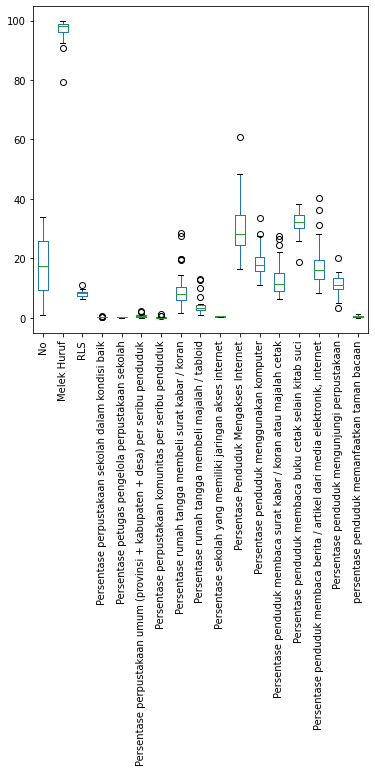

In [ ]:
boxplot = data.boxplot(figsize = (6,6), rot = 90, fontsize= '10', grid = False)

Data yang tidak memiliki outlier, yaitu Persentase petugas pengelola perpustakaan sekolah, Persentase sekolah yang memiliki jaringan akses internet, dan persentase penduduk memanfaatkan taman bacaan.

In [ ]:
# Menghapus kolom-kolom yang tidak diperlukan karena telah diganti dan diakumulasikan menjadi variable yang telah dibuat sebelumnya
col_del = ["Provinsi","No"]
data=data.drop(columns=col_del,axis=1)
data.head()

,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan
0,98.47,8.98,0.20,0.09,0.54,0.04,5.80,2.02,0.50,22.86,14.93,22.13,35.73,16.54,13.14,0.59
1,96.21,8.55,0.41,0.18,0.54,0.02,9.78,2.92,0.51,39.49,23.22,15.08,30.30,22.17,14.09,0.34
2,98.04,8.53,0.25,0.08,1.17,1.35,8.11,3.27,0.62,37.46,20.54,9.54,29.01,21.00,10.72,1.01
3,98.63,8.47,0.19,0.30,0.11,0.01,8.56,2.73,0.42,26.71,18.54,14.14,35.03,16.05,15.28,0.90
4,97.09,9.19,0.38,0.28,0.59,0.58,19.76,10.08,0.66,45.38,27.43,26.62,33.93,31.09,20.15,0.59


In [ ]:
scaled_features = StandardScaler().fit_transform(data.values)
scaled_features_df = pd.DataFrame(scaled_features,
                                  index=data.index,
                                  columns=data.columns)

In [ ]:
# scaled_features = data.values
# scaled_features_df = pd.DataFrame(scaled_features,
#                                   index=data.index,
#                                   columns=data.columns)

In [ ]:
scaled_features_df.head()

,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan
0,0.451959,0.755674,-0.499377,-0.641227,-0.162195,-0.458370,-0.611105,-0.720821,0.258037,-0.807665,-0.791461,1.594498,0.958328,-0.149323,0.559280,0.237864
1,-0.144444,0.302889,2.065768,0.442837,-0.162195,-0.538703,0.006573,-0.393710,0.336370,1.016024,0.959019,0.355677,-0.386405,0.617605,0.862430,-0.567651
2,0.338484,0.281829,0.111372,-0.761679,0.995878,4.803436,-0.252603,-0.266500,1.198029,0.793409,0.393122,-0.617809,-0.705872,0.458226,-0.212956,1.591129
3,0.494182,0.218650,-0.621527,1.888255,-0.952626,-0.578870,-0.182765,-0.462767,-0.368624,-0.385464,-0.029189,0.190500,0.784974,-0.216072,1.242166,1.236702
4,0.087784,0.976802,1.699318,1.647352,-0.070285,1.710619,1.555424,2.208645,1.511360,1.661937,1.847984,2.383478,0.512560,1.832704,2.796212,0.237864


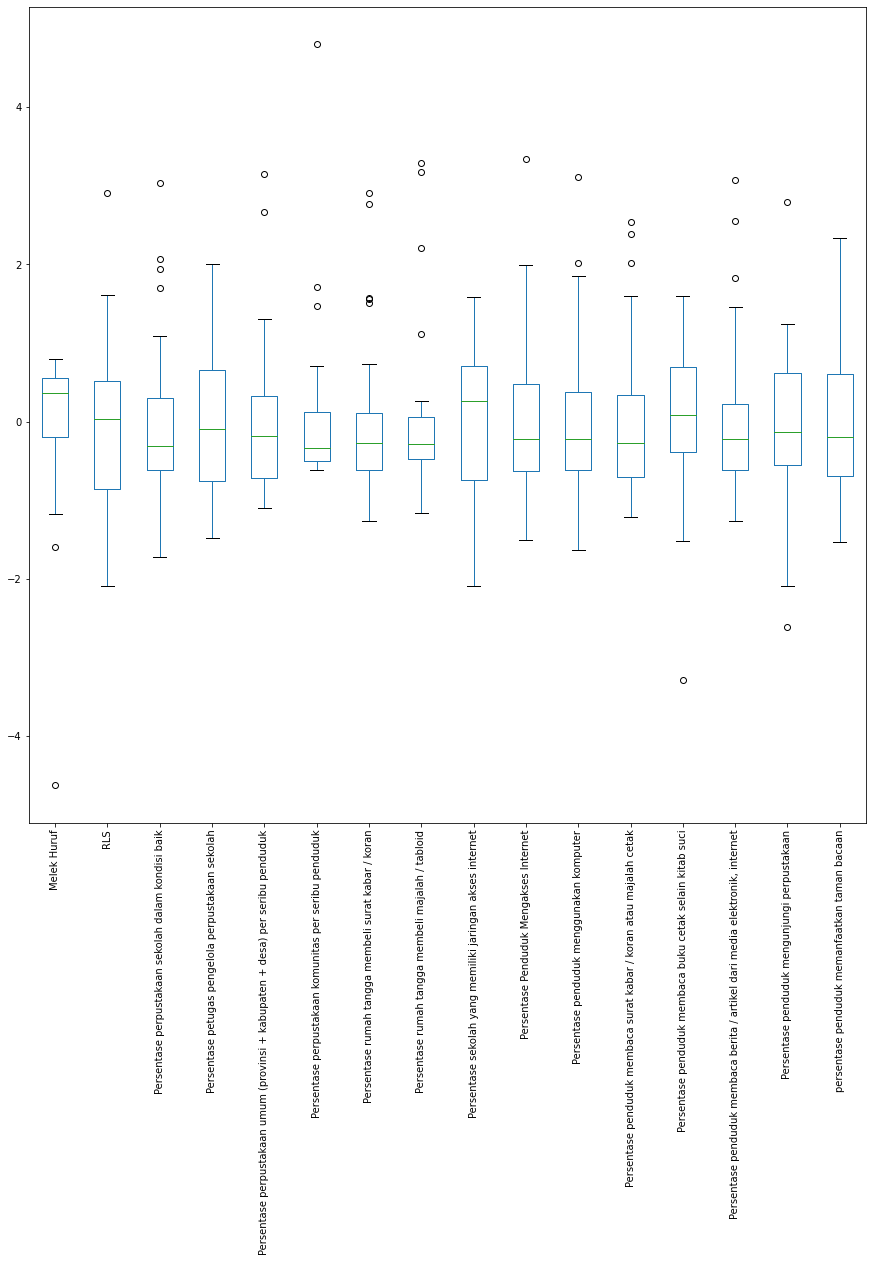

In [ ]:
boxplot = scaled_features_df.boxplot(figsize = (15,15), rot = 90, fontsize= '10', grid = False)

## Handle Outliers

Text(0.5, 0, 'Sample')

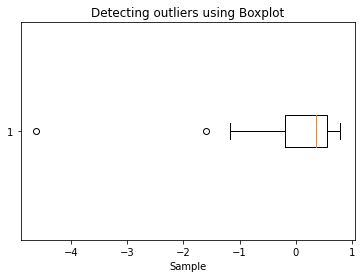

In [ ]:
import matplotlib.pyplot as plt
plt.boxplot(scaled_features_df["Melek Huruf"], vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

In [ ]:
import numpy as np

stratified_df = scaled_features_df.copy()

def detect_outliers_zscore(data,column_name):
    new_data = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            # Outlier data changed to mean
            i = mean
            print("changed", i, " in ", column_name)
        new_data.append(i)
    return new_data

def check_outliers(column_name):
  stratified_df[column_name] = detect_outliers_zscore(scaled_features_df[column_name], column_name)

for col in scaled_features_df.columns:
  check_outliers(col)

changed 1.4236977609899067e-15  in  Melek Huruf
changed 1.0857328108466604e-16  in  Persentase perpustakaan sekolah dalam kondisi baik
changed 1.1102230246251565e-16  in  Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk
changed 3.2653618371328135e-17  in  Persentase perpustakaan komunitas per seribu penduduk
changed 1.1592034521821488e-16  in  Persentase rumah tangga membeli majalah / tabloid
changed 1.1592034521821488e-16  in  Persentase rumah tangga membeli majalah / tabloid
changed -1.3387983532244534e-16  in  Persentase Penduduk Mengakses Internet
changed -3.7796563264812313e-16  in  Persentase penduduk menggunakan komputer
changed -1.959217102279688e-17  in  Persentase penduduk membaca buku cetak selain kitab suci
changed -4.408238480129298e-17  in  Persentase penduduk membaca berita / artikel dari media elektronik, internet


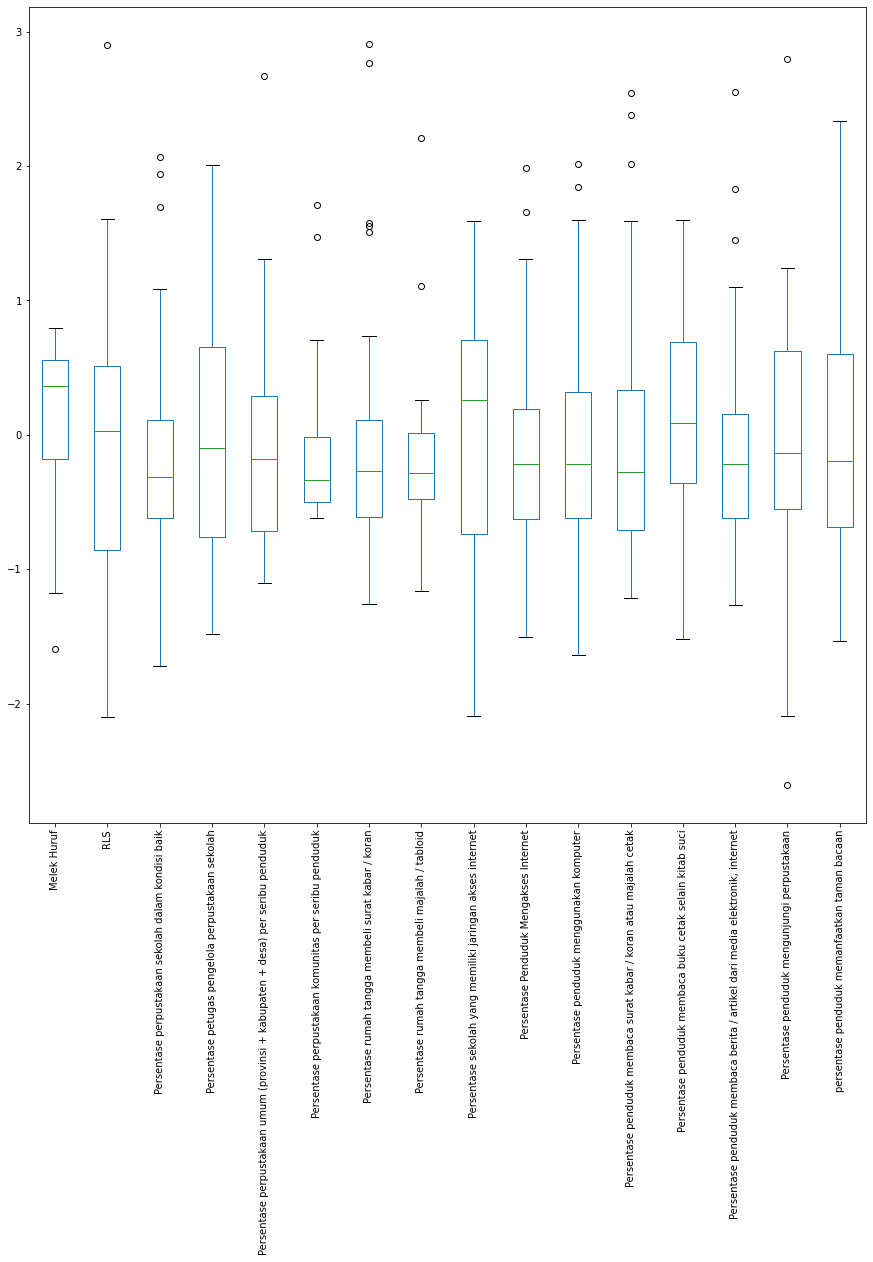

In [ ]:
stratified_df.boxplot(figsize = (15,15), rot = 90, fontsize= '10', grid = False)

In [ ]:
# REPLACE WITH NEW DATA
scaled_features_df = stratified_df

## KMeans Implementation

In [ ]:
K = 2
kmeans_2 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_2.fit(scaled_features_df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.028s


In [ ]:
K = 3
kmeans_3 = KMeans(n_clusters=K, random_state=11)

start = time()
kmeans_3.fit(scaled_features_df)
print(f"Done fitting kMeans in {time()-start:.3f}s")

Done fitting kMeans in 0.028s


In [ ]:
kmeans_cluster = data.assign(
    clusters_of_2 = kmeans_2.predict(scaled_features),
    clusters_of_3= kmeans_3.predict(scaled_features),
)

with pd.option_context("display.max_columns", None):
    display(kmeans_cluster)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan,clusters_of_2,clusters_of_3
0,98.47,8.98,0.20,0.09,0.54,0.04,5.80,2.02,0.50,22.86,14.93,22.13,35.73,16.54,13.14,0.59,0,0
1,96.21,8.55,0.41,0.18,0.54,0.02,9.78,2.92,0.51,39.49,23.22,15.08,30.30,22.17,14.09,0.34,1,0
2,98.04,8.53,0.25,0.08,1.17,1.35,8.11,3.27,0.62,37.46,20.54,9.54,29.01,21.00,10.72,1.01,0,0
3,98.63,8.47,0.19,0.30,0.11,0.01,8.56,2.73,0.42,26.71,18.54,14.14,35.03,16.05,15.28,0.90,0,0
4,97.09,9.19,0.38,0.28,0.59,0.58,19.76,10.08,0.66,45.38,27.43,26.62,33.93,31.09,20.15,0.59,1,2
5,99.49,11.02,0.49,0.06,0.22,0.26,27.56,13.06,0.67,60.65,33.40,24.51,30.22,40.22,10.30,0.55,1,2
6,97.42,7.28,0.33,0.03,0.12,0.00,5.00,2.98,0.41,27.31,17.61,11.87,31.04,15.40,14.76,0.83,0,0
7,98.15,8.15,0.17,0.27,2.34,0.07,9.10,3.49,0.51,26.67,17.08,9.83,31.71,17.59,9.22,0.35,0,0
8,98.55,8.14,0.19,0.15,2.08,0.52,10.42,4.70,0.63,37.02,19.83,11.46,28.07,18.02,10.97,0.49,0,0
9,96.01,7.27,0.24,0.20,0.05,0.03,6.32,3.16,0.58,30.73,17.68,8.99,25.72,14.37,10.95,0.48,0,0


In [ ]:
kmeans_cluster.groupby(by='clusters_of_2').count()

,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan,clusters_of_3
clusters_of_2,,,,,,,,,,,,,,,,,
0,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
1,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7


In [ ]:
kmeans_cluster.groupby(by='clusters_of_2').mean()

,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan,clusters_of_3
clusters_of_2,,,,,,,,,,,,,,,,,
0,96.41963,7.972222,0.217037,0.137037,0.662963,0.154444,7.144444,3.052222,0.454815,26.659259,16.810741,10.812593,31.455926,14.599630,10.841481,0.494444,0.407407
1,98.06000,9.381429,0.332857,0.167143,0.494286,0.152857,19.740000,7.671429,0.514286,43.978571,25.881429,21.708571,33.420000,29.348571,13.492857,0.600000,1.142857


In [ ]:
kmeans_cluster.groupby(by='clusters_of_3').count()

,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan,clusters_of_2
clusters_of_3,,,,,,,,,,,,,,,,,
0,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
1,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
kmeans_cluster.groupby(by='clusters_of_3').mean()

,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan,clusters_of_2
clusters_of_3,,,,,,,,,,,,,,,,,
0,97.707895,8.273684,0.251579,0.152632,0.614737,0.133684,9.448947,3.591053,0.511579,30.855789,18.871053,13.618421,31.791579,17.992632,11.958947,0.583684,0.157895
1,94.443636,7.669091,0.176364,0.115455,0.710000,0.157273,5.078182,2.268182,0.351818,22.260909,14.655455,8.192727,31.302727,11.074545,9.254545,0.277273,0.000000
2,98.605000,9.840000,0.367500,0.175000,0.467500,0.242500,23.922500,10.732500,0.572500,49.130000,28.825000,23.757500,33.720000,33.987500,14.537500,0.852500,1.000000


## Evaluation

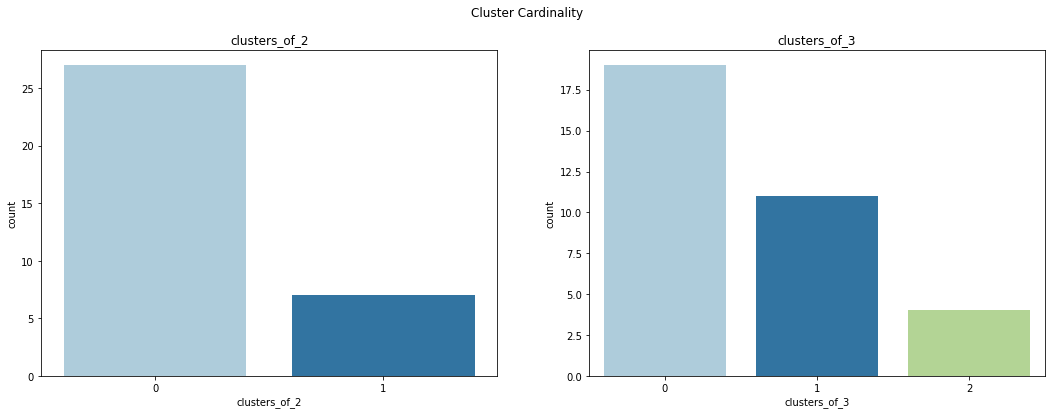

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(18, 6))
for ax, preds in zip(axis, ["clusters_of_2", "clusters_of_3"]):
    sns.countplot (x=preds, data=kmeans_cluster, ax=ax, palette="Paired")
    ax.set_title(preds)
plt.suptitle("Cluster Cardinality")
plt.show()

## Elbow Method

In [ ]:
# sum of squared distances
ssd = []

# may take a longer time to run (takes up to approximately 6 min)
for k in range(1, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(scaled_features)
    print(f"Done clustering in {time()-start:.3f}s")

    ssd.append(model.inertia_)

Clustering with n_clusters=1
Done clustering in 0.019s
Clustering with n_clusters=2
Done clustering in 0.301s
Clustering with n_clusters=3
Done clustering in 0.111s
Clustering with n_clusters=4
Done clustering in 0.082s
Clustering with n_clusters=5
Done clustering in 0.049s
Clustering with n_clusters=6
Done clustering in 0.071s
Clustering with n_clusters=7
Done clustering in 0.118s
Clustering with n_clusters=8
Done clustering in 0.150s
Clustering with n_clusters=9
Done clustering in 0.069s
Clustering with n_clusters=10
Done clustering in 0.060s


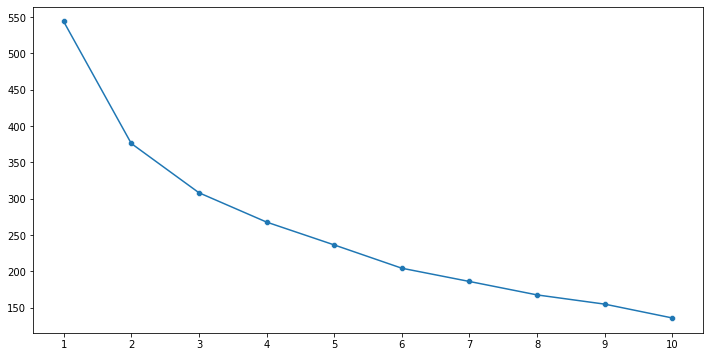

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=range(1, 11), y=ssd)
sns.scatterplot(x=range(1, 11), y=ssd)
plt.xticks(range(1, 11))
plt.show()

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_scores = []

# INFORMATION
# It may take a longer time to run, the sample data took around 46m 30s to be completed

for k in range(2, 11):
    model = KMeans(n_clusters=k, random_state=11)
    print(f"Clustering with n_clusters={k}")
    start = time()
    model.fit(scaled_features_df)
    print(f"Done clustering in {time()-start:.3f}s")

    print("Calculating silhouette coefficient..")
    start = time()
    silhouette_scores.append(silhouette_score(scaled_features_df, model.labels_))
    print(f"Done calculating in {time()-start:.3f}s")

Clustering with n_clusters=2
Done clustering in 0.019s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=3
Done clustering in 0.022s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=4
Done clustering in 0.020s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=5
Done clustering in 0.022s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=6
Done clustering in 0.023s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=7
Done clustering in 0.029s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=8
Done clustering in 0.026s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=9
Done clustering in 0.033s
Calculating silhouette coefficient..
Done calculating in 0.002s
Clustering with n_clusters=10
Done clustering in

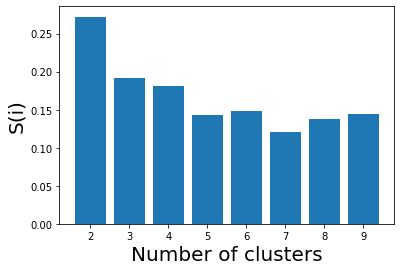

In [ ]:
silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()

In [ ]:
silhouette_scores

[0.2721713780720847,
 0.19161598766717775,
 0.18062843221138697,
 0.14333158679861552,
 0.14783146404849548,
 0.12079578107305029,
 0.13746578122800396,
 0.1436670856536641]

In [ ]:
sc=max(silhouette_scores)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  2


### The result above is 2 so we use 2 as the clusters

In [ ]:
pred = kmeans_2.predict(scaled_features_df)

In [ ]:
data_copy = data.copy()

In [ ]:
data_copy['cluster'] = pred + 1

In [ ]:
data_copy

,Melek Huruf,RLS,Persentase perpustakaan sekolah dalam kondisi baik,Persentase petugas pengelola perpustakaan sekolah,Persentase perpustakaan umum (provinsi + kabupaten + desa) per seribu penduduk,Persentase perpustakaan komunitas per seribu penduduk,Persentase rumah tangga membeli surat kabar / koran,Persentase rumah tangga membeli majalah / tabloid,Persentase sekolah yang memiliki jaringan akses internet,Persentase Penduduk Mengakses Internet,Persentase penduduk menggunakan komputer,Persentase penduduk membaca surat kabar / koran atau majalah cetak,Persentase penduduk membaca buku cetak selain kitab suci,"Persentase penduduk membaca berita / artikel dari media elektronik, internet",Persentase penduduk mengunjungi perpustakaan,persentase penduduk memanfaatkan taman bacaan,cluster
0,98.47,8.98,0.20,0.09,0.54,0.04,5.80,2.02,0.50,22.86,14.93,22.13,35.73,16.54,13.14,0.59,1
1,96.21,8.55,0.41,0.18,0.54,0.02,9.78,2.92,0.51,39.49,23.22,15.08,30.30,22.17,14.09,0.34,2
2,98.04,8.53,0.25,0.08,1.17,1.35,8.11,3.27,0.62,37.46,20.54,9.54,29.01,21.00,10.72,1.01,1
3,98.63,8.47,0.19,0.30,0.11,0.01,8.56,2.73,0.42,26.71,18.54,14.14,35.03,16.05,15.28,0.90,1
4,97.09,9.19,0.38,0.28,0.59,0.58,19.76,10.08,0.66,45.38,27.43,26.62,33.93,31.09,20.15,0.59,2
5,99.49,11.02,0.49,0.06,0.22,0.26,27.56,13.06,0.67,60.65,33.40,24.51,30.22,40.22,10.30,0.55,2
6,97.42,7.28,0.33,0.03,0.12,0.00,5.00,2.98,0.41,27.31,17.61,11.87,31.04,15.40,14.76,0.83,1
7,98.15,8.15,0.17,0.27,2.34,0.07,9.10,3.49,0.51,26.67,17.08,9.83,31.71,17.59,9.22,0.35,1
8,98.55,8.14,0.19,0.15,2.08,0.52,10.42,4.70,0.63,37.02,19.83,11.46,28.07,18.02,10.97,0.49,1
9,96.01,7.27,0.24,0.20,0.05,0.03,6.32,3.16,0.58,30.73,17.68,8.99,25.72,14.37,10.95,0.48,1


#Analysis

Based on the results of Elbow Method and Sillhouette, the best number of clusters is 2.
Using K-Means get 2 cluster. Cluster 1 contains 29 province and cluster 2 contains 5 clusters.
* Trait cluster 1 (The percentage of school libraries and residents who access the internet is below 32%, Mostly the percentage of the community library is around 0-1%, The percentage of residents who visit the public library is below 12%, The percentage of residents who use the computer is below 18%, Mostly the percentage of residents who read news or magazine from electronic media is below 21%, low visits to the library, purchasing power, uneven distribution of existing libraries).

* Trait cluster 2 (The percentage of residents who access the internet is above 32%, The percentage of residents who visit the public library is between 8%-20%
The percentage of community libraries in Java is above 12%, while outside Java is around 1% ,The percentage of residents who use the computer is above 18%, Most percentage of residents who read newspapers or magazines from electronic media is above 21%).


##Solution

 * For cluster 1, there are two provinces that have high internet access but the percentage of reading online and offline is relatively low and he percentage of visiting the library is about 8%. So, we can also 'Reading website' to increase percentage of reading. In addition, other provincial problems in cluster 2 are low internet access is followed by low visits to the library, purchasing power, uneven distribution of existing libraries could be solved by collaborate with the government to create a mobile library program in order to serve region that has poor internet network.
 * For cluster 2, focus on North Sulawesi has internet access above 32%. However, the percentage of purchasing newspapers or magazines, reading news offline and online, and visiting the library is the last in cluster 1. We can use 'Reading website' can be made which contains articles, news, fiction and non-fiction books in order to engage internet user to read and equipped with audio.